# Importing

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
#Create a path to where your data is stored.
path = r'C:\Users\rubix\Downloads\Machine Learning 1\02 Data\Prepared Data'

In [3]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'weather_scaled.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


# Prepare for gradient descent

## Reduce Columns to Only the Mean Temperatures

In [4]:
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

## Check for changes

In [5]:
df

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,19600101,1,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.927601,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-1.280450,-0.124331,-0.391072,-0.257321,-0.668215
1,19600102,1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.825294,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.539569,-0.650834,-0.415953,-0.335759,-0.548046
2,19600103,1,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.940389,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.876333,-0.650834,-0.615003,-0.210258,-0.067372
3,19600104,1,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-1.042696,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.775304,-0.943336,-0.764290,-0.069069,-0.998679
4,19600105,1,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.978754,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.926848,-0.621584,-0.503037,-0.037694,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,0.747959,0.628750,-0.005167,0.898267,1.042841,0.440753,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,-0.000746,0.826301,0.517090,1.295755,-0.007287
22946,20221028,10,0.856604,0.367720,-0.005167,0.945734,1.278467,0.466330,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,-0.000746,1.074927,0.641496,1.358505,-0.007287
22947,20221029,10,0.856604,0.083991,-0.005167,0.914089,1.101748,0.786039,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,-0.000746,1.221178,0.716139,1.405568,-0.007287
22948,20221030,10,0.680055,0.265577,-0.005167,0.692578,0.880848,0.376811,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,-0.000746,1.235803,0.019467,0.668249,-0.007287


## Pick a year and City

You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.

### Prep and Checks

In [6]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

#### Whisker plot visualization for mean temperatures

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

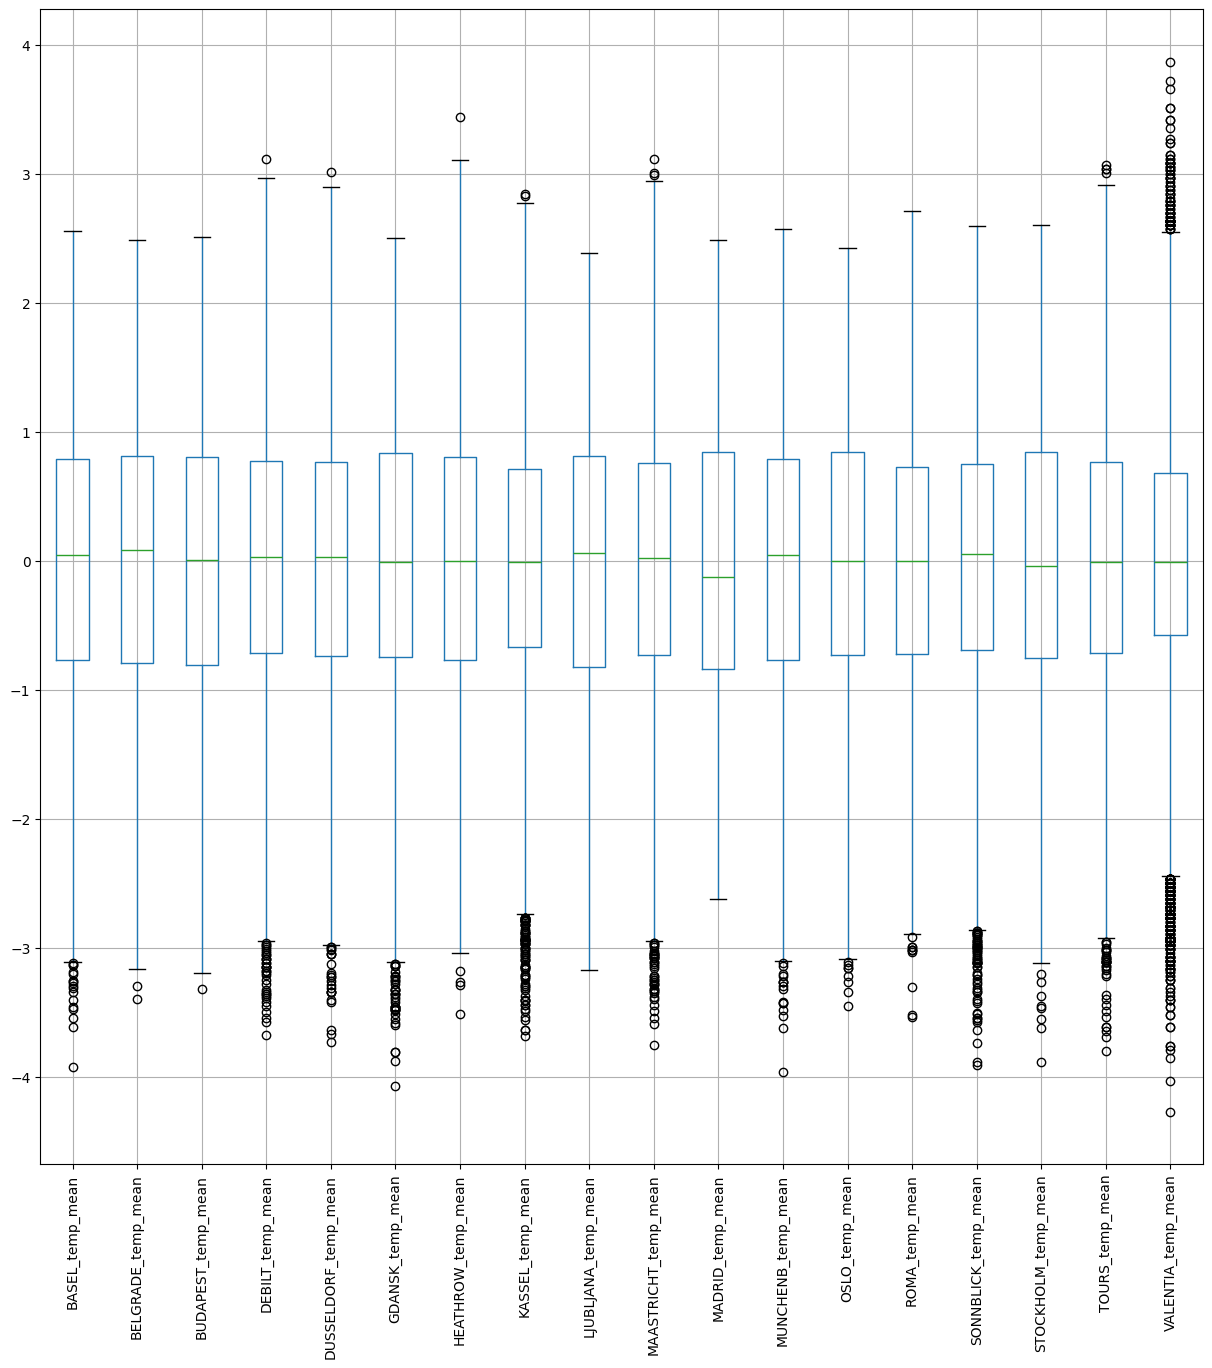

In [7]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

### Choose a year

In [8]:
#Reduce your dataset to a single year
dfyear_2020 = df[df['DATE'].astype(str).str.startswith('2020')] #<-----INSERT YEAR HERE

# I changed .str.contains to .str.startswith because the year 2020 could also be read as February 2nd in any year
# and therefore created too many data points for the year

dfyear_2020

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
21915,20200101,1,-1.465688,-1.209812,-0.934476,-1.459245,-1.387053,-0.735776,-1.102331,-0.005705,-1.370824,-1.612392,-1.123071,-1.032352,-0.550620,-0.000746,-0.153581,-0.478156,-0.869139,-0.007287
21916,20200102,1,-1.397785,-1.141717,-1.169744,-0.968756,-1.225060,-0.953178,-0.595665,-0.005705,-1.625113,-0.997267,-1.203946,-1.321402,-0.283654,-0.000746,-0.051205,-0.192023,-0.414197,-0.007287
21917,20200103,1,-0.691591,-1.357351,-1.569699,-0.383334,-0.444548,-0.799717,-0.386009,-0.005705,-1.419260,-0.397145,-1.500486,-0.693033,-0.235114,-0.000746,0.007295,-0.241785,-0.288696,-0.007287
21918,20200104,1,-0.596526,-1.504889,-1.063873,-0.525734,-0.827441,-0.556739,-0.980032,-0.005705,-1.104426,-0.772222,-1.069155,-0.592494,-0.696239,-0.000746,-0.694709,-0.615003,-0.978952,-0.007287
21919,20200105,1,-1.180494,-1.050924,-1.040346,-0.494089,-0.635995,-0.722987,-0.648078,-0.005705,-1.225516,-0.637194,-1.176988,-0.818707,-0.793317,-0.000746,-1.382089,-0.901136,-0.822076,-0.007287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22276,20201227,12,-1.180494,-1.130368,-1.369721,-0.794712,-0.871621,-1.017119,-0.875205,-0.005705,-1.382933,-0.877243,-1.635277,-1.396806,-0.429272,-0.000746,-1.148087,-0.391072,-0.947577,-0.007287
22277,20201228,12,-0.786655,-0.528863,-0.863895,-1.016223,-0.945254,-0.710199,-1.783711,-0.005705,-1.261843,-1.087286,-1.244383,-1.095189,-0.623429,-0.000746,-1.177337,-0.391072,-1.135828,-0.007287
22278,20201229,12,-0.813817,-0.131643,-0.346305,-1.000401,-1.357599,-0.480009,-1.539113,-0.005705,-0.947009,-1.207310,-1.406132,-0.781005,-0.502081,-0.000746,-1.235838,-0.366191,-1.041702,-0.007287
22279,20201230,12,-1.058269,-0.052199,-0.499230,-0.921290,-1.048340,-0.838082,-1.521642,-0.005705,-0.934900,-1.012270,-1.365695,-0.856409,-0.574890,-0.000746,-1.279713,-0.565240,-1.120141,-0.007287


### Check

In [9]:
dfyear_2020.describe()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
count,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000,366.000000,366.000000,3.660000e+02
mean,2.020067e+07,6.513661,0.236087,0.191498,0.172345,0.263519,0.226841,0.246097,0.241620,-5.705221e-03,0.170559,0.279836,0.145252,0.250035,0.275909,-7.461638e-04,0.256961,0.295811,0.319435,-7.287352e-03
std,3.457653e+02,3.455958,0.934854,0.915643,0.923699,0.880960,0.905961,0.815164,0.974223,4.777020e-17,0.916080,0.913584,1.003402,0.875189,0.783143,4.451314e-18,0.888164,0.788996,0.922377,4.603310e-17
min,2.020010e+07,1.000000,-1.682979,-1.629730,-1.581463,-1.490890,-1.607952,-1.336828,-2.115665,-5.705221e-03,-1.625113,-1.732417,-1.635277,-1.434508,-1.290846,-7.461638e-04,-2.113343,-1.075304,-1.543707,-7.287352e-03
25%,2.020040e+07,4.000000,-0.552389,-0.560073,-0.590396,-0.430800,-0.503455,-0.425658,-0.508308,-5.705221e-03,-0.644284,-0.427152,-0.637824,-0.476246,-0.356463,-7.461638e-04,-0.292519,-0.328869,-0.414197,-7.287352e-03
50%,2.020070e+07,7.000000,0.238684,0.237205,0.177166,0.233733,0.173970,0.140227,0.103186,-5.705221e-03,0.209401,0.232983,-0.091921,0.293506,0.110729,-7.461638e-04,0.248609,0.112771,0.323121,-7.287352e-03
75%,2.020098e+07,9.750000,0.978830,0.986248,0.947669,0.898267,0.851395,0.949090,1.029164,-5.705221e-03,0.923832,0.949378,0.996516,0.953293,0.866124,-7.461638e-04,0.914051,0.949400,0.966314,-7.287352e-03
max,2.020123e+07,12.000000,2.309734,1.945251,1.935795,2.686179,2.500777,2.039297,3.038360,-5.705221e-03,1.934934,2.783501,2.327576,2.147194,2.203991,-7.461638e-04,2.230310,2.159246,2.660579,-7.287352e-03


## Pick a Place

In [10]:
#Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year.

### Prep by dropping DATE and MONTH

In [11]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear_2020.drop(['DATE','MONTH'], axis=1)

## Visualize the Temperature Data

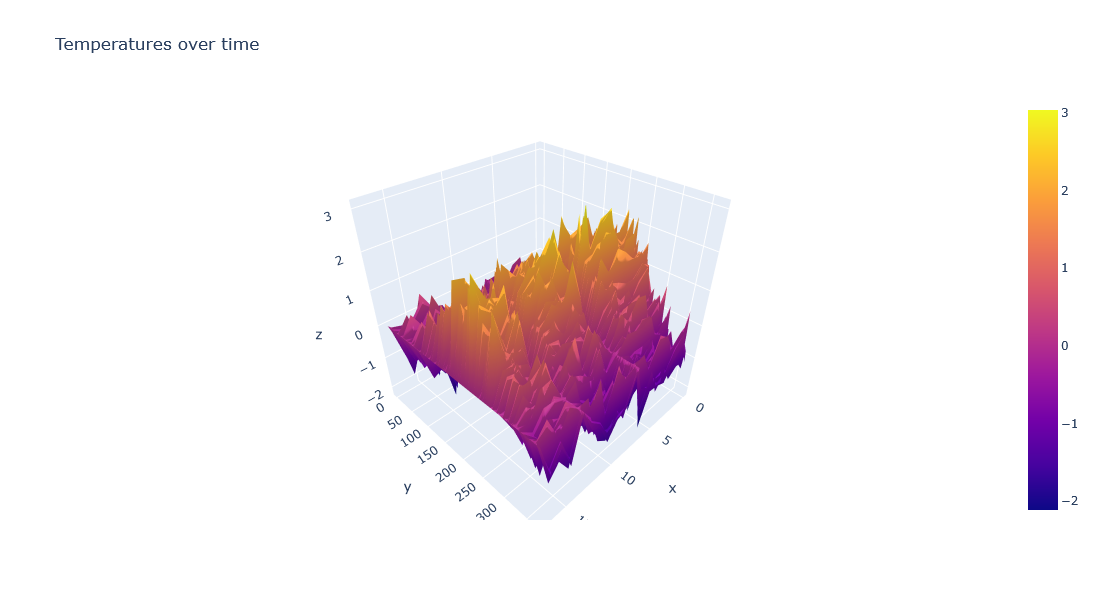

In [12]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

## Create Index for More Visualization Options

In [13]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
361,3.62
362,3.63
363,3.64
364,3.65


### Check

In [14]:
n_rows = dfyear_2020.shape[0]
n_rows

366

## Merge Index and Data

In [15]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear_2020['DUSSELDORF_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

## Checks and Analysis

In [16]:
X.shape, y.shape

((366, 2), (366, 1))

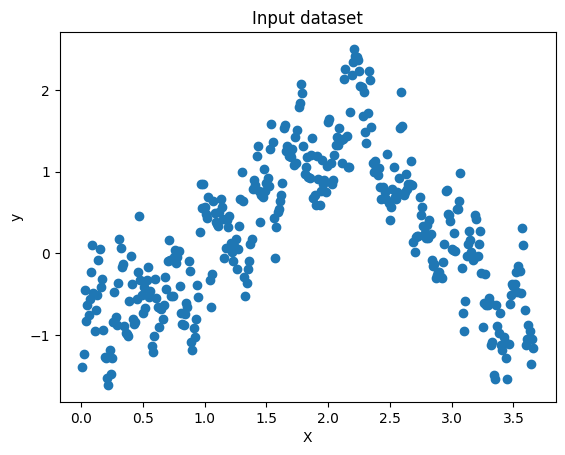

In [17]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear_2020['DUSSELDORF_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [18]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear_2020['DUSSELDORF_temp_mean'].min()

-1.607952180925852

In [19]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear_2020['DUSSELDORF_temp_mean'].max()

2.500777329228359

# Loss Function

In [20]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

## Check

In [21]:
compute_cost(X,y)

array([0.43498979])

# Gradient Descent Function

In [22]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

## Choose Values

In [23]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=10 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 0 ns
Wall time: 5.28 ms


## Check for Theta

In [24]:
theta

array([[0.79072538],
       [0.54587625]])

# Loss and Thetas over Time (1,1)

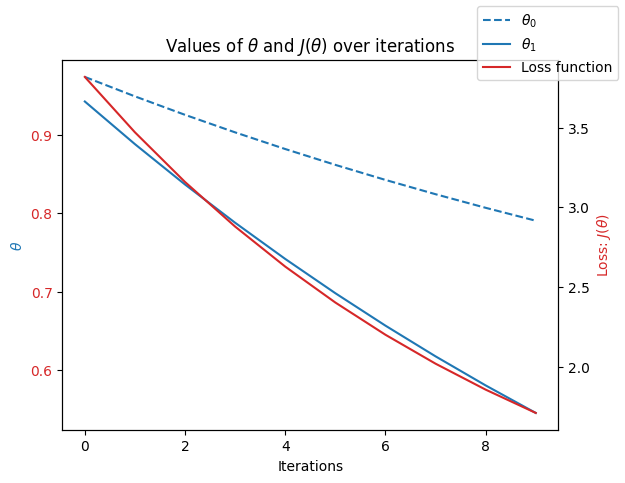

In [25]:
#This will plot your loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

### Note

The shape of these lines are not what was expected based on instructions. The code said to start with 1 and 1 for the guesses.

We know the red line should converge to 0 (where it says loss) and it's just not there yet. We need either more iterations or maybe larger step sizes.

The original file had -10 and -5 as the guesses and .1 for the step size. Let's try those and make it 50 iterations.

## Change Values to Match Expected Graph Shape

In [26]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-10],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 31.2 ms
Wall time: 26.5 ms


## Plot New Data

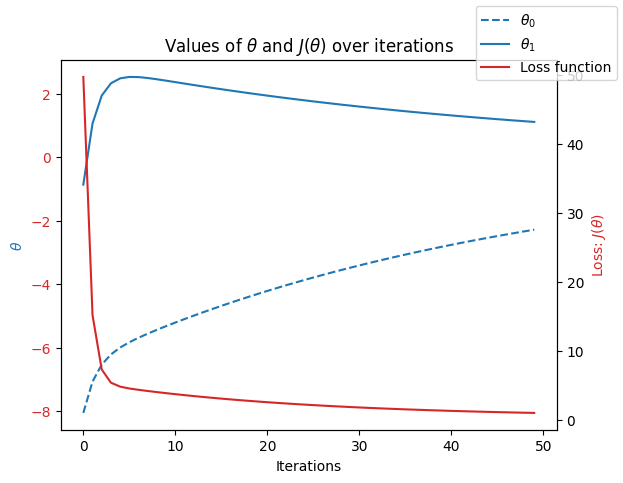

In [27]:
#This will plot your loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

Good. This is much closer to the expected shape. That being said, it's fairly close to 0 around 20-30 so we won't need all those iterations. Similarly, the increased step size gets to a gentler slope faster, around 3 or 4.

In [28]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.84 s
Wall time: 1.83 s


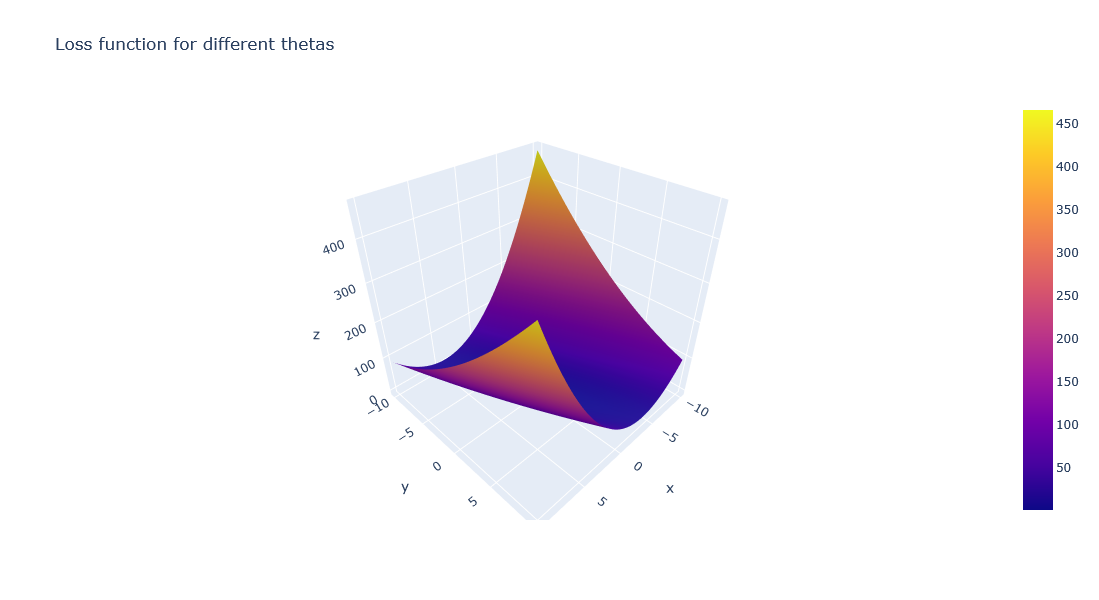

In [30]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## Visualization including Loss Line

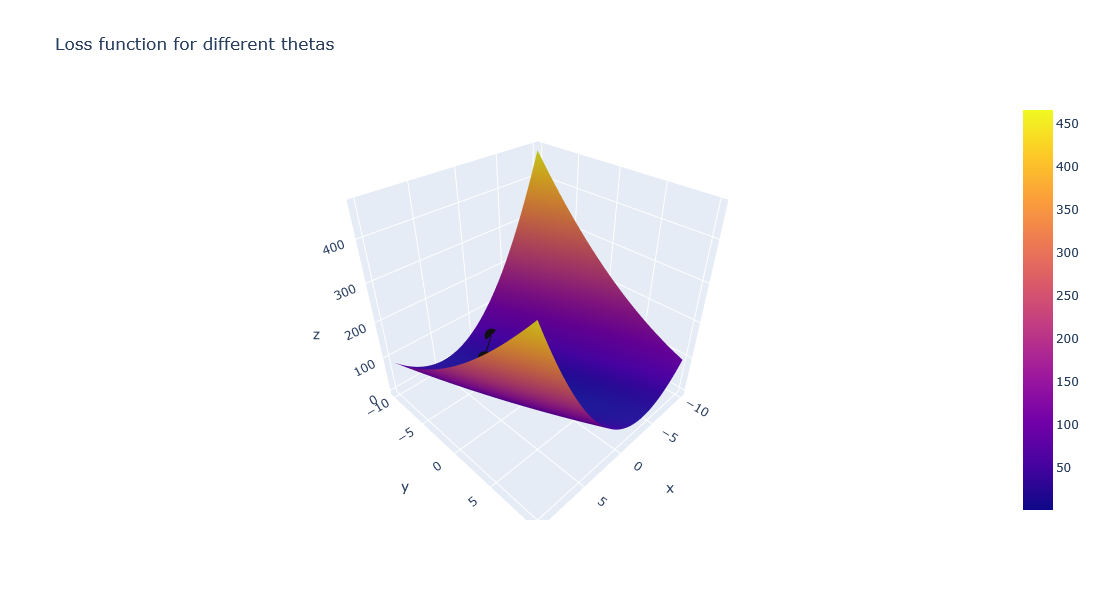

In [31]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

## More Predictions

In [31]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=50 #<---start with the same iterations as above
theta_init=np.array([[0],[0]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [32]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

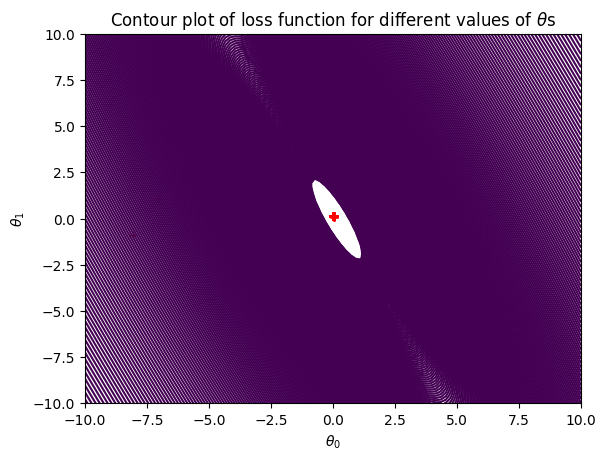

In [33]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

# Summary of 1st Station

So, I'm not seeing a lot of points which I'm guessing is good because it means that good guesses for the minimum were eventually made.

50 iterations seems like overkill, but I was playing with different values to see what would happen.

Starting a 1, 1 also didn't result in the graph shape that I was expecting. The starting numbers of -10 and -5 were interesting and got better results in that it clearly descended through the data before settling down.

Also, since the graph is interactive (very cool) you can basically hover over the minimum and see the x, y, and z coordinates.

But now I have to do it a couple more times with different locations.

# 2nd Station

## Choose a Year

In [34]:
# Reduce your dataset to a single year
dfyear_1988 = df[df['DATE'].astype(str).str.startswith('1988')] #<-----INSERT YEAR HERE

# I copied this from above, keeping the .startswith('')

dfyear_1988

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
10227,19880101,1,-0.610107,-1.209812,-0.981529,-0.288400,-0.253102,-0.595104,-0.281182,-0.404402,-0.959118,-0.322130,-1.338737,-0.579927,-0.150170,-1.280450,-0.007330,-0.453275,-0.476948,-0.187540
10228,19880102,1,0.041765,-1.096320,-1.087400,0.138800,0.026704,-0.057993,-0.141411,-0.020472,-0.704829,0.097955,-1.150029,0.048442,-0.405002,-1.617214,0.065796,-0.378632,-0.069069,-0.698257
10229,19880103,1,-0.352074,-0.506165,-0.875659,-0.304223,-0.385642,0.005949,-0.578193,-0.419168,-0.535303,-0.367139,-0.664782,-0.403983,-0.550620,-0.724789,-0.475333,-0.279107,-0.571074,-0.788384
10230,19880104,1,-0.243429,-0.540212,-0.781551,-0.320045,-0.370915,-0.237030,-0.455894,-0.670199,-0.632175,-0.352136,-1.163509,-0.579927,-0.708373,-0.842657,-0.665459,-0.415953,-0.398510,-1.058763
10231,19880105,1,0.109668,-0.574259,-0.628627,-0.098534,0.056157,-0.364913,-0.490837,-0.035238,-0.220469,-0.052075,-1.055676,-0.253175,-0.756913,-1.112068,-0.255956,-0.702087,0.072119,-1.779775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,19881227,12,-0.678010,-0.994178,-0.569810,-0.130178,-0.223649,-0.045204,-0.403481,-0.463468,-1.540350,-0.172100,-0.988280,-0.667898,-0.793317,-1.566700,-0.255956,-0.826492,-0.633824,-0.187540
10589,19881228,12,-1.017527,-0.869337,-0.558047,-0.161822,-0.120563,-0.300972,-0.211297,-0.374868,-1.382933,-0.127091,-1.230904,-0.429118,-0.696239,-1.953979,-0.372957,-0.814052,-0.947577,-0.127456
10590,19881229,12,-0.963204,-1.232510,-0.805078,-0.414978,-0.547635,-0.083570,-0.578193,-0.463468,-1.419260,-0.562179,-1.379174,-0.881544,-0.417137,-1.566700,0.182796,-0.167142,-1.167204,0.263092
10591,19881230,12,-1.289140,-1.073622,-0.769788,-0.668134,-1.018887,-0.147511,-0.665550,-0.891697,-1.600895,-0.907249,-1.176988,-1.070054,-0.235114,-1.583538,0.226672,-0.453275,-1.214266,0.142923


### Note:

This is a leap year and doesn't require a change to the index used earlier.

## Scatterplot

Check out Temperature data for that year

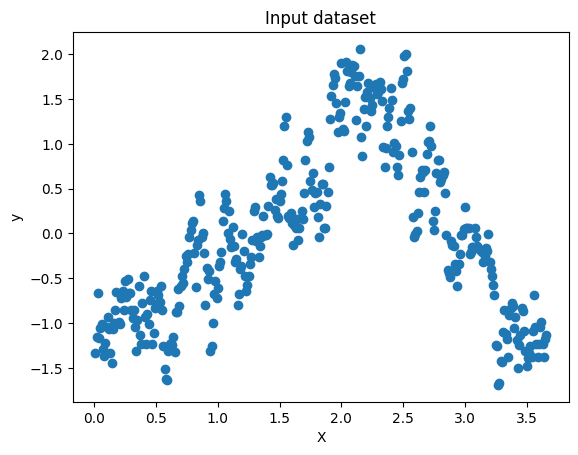

In [35]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear_1988['MADRID_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

## Merging Index and Station

In [36]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear_1988['MADRID_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

## Choose Values

In [75]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[10],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 31.2 ms
Wall time: 27.2 ms


## Plot Data

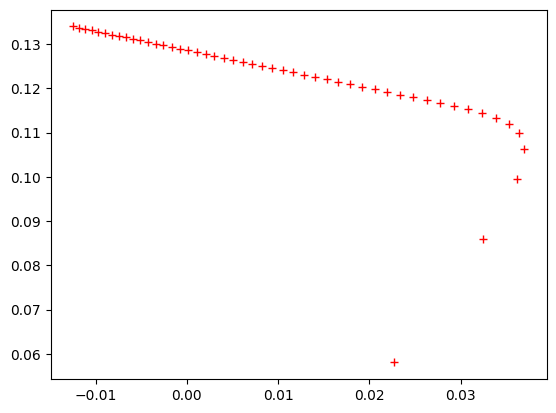

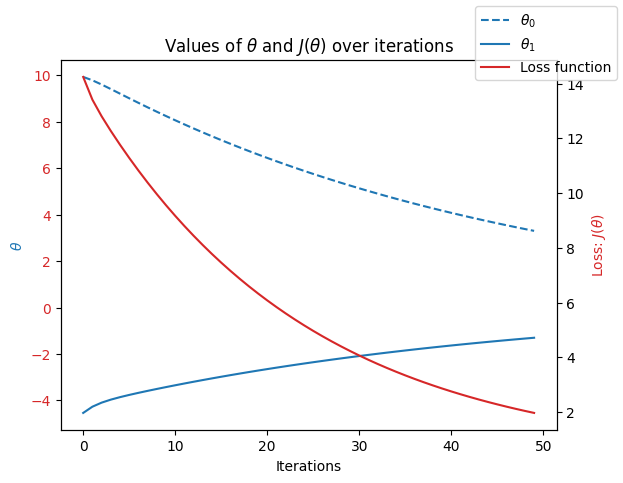

In [76]:
#This will plot your loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

## Visualizations

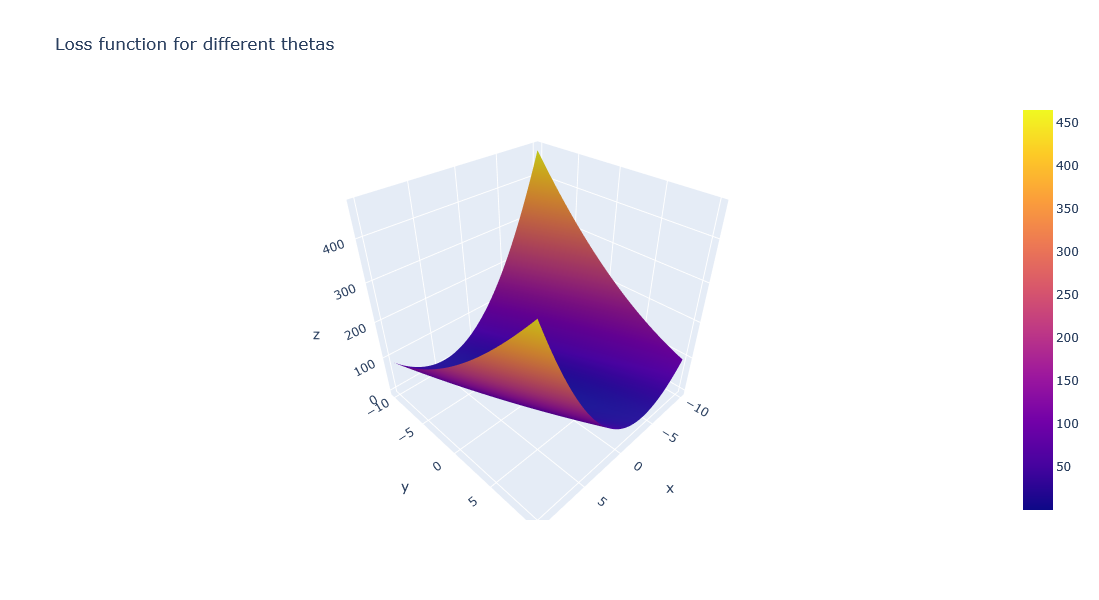

In [77]:
line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

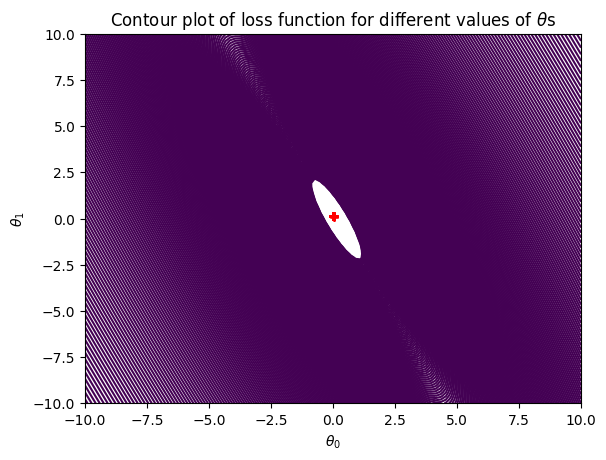

In [40]:
plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

## Summary of 2nd Station

These are very similar looking with little in the way of changes to values.

I experimented a little before landing on the numbers for thetas, iterations, and step size which makes me wonder if that's okay. Obviously I'm guessing to some degree, but at what point am I wasting time trying to fit the graphs to what I want it to look like?

Maybe I should try some wild numbers to see how well it can get to the actual minimum for "testing" purposes, haha. Maybe later :)

# 3rd Station

## Choose a year

In [41]:
#Reduce your dataset to a single year
dfyear_2000 = df[df['DATE'].astype(str).str.startswith('2000')] #<-----INSERT YEAR HERE

# I changed .str.contains to .str.startswith because the year 2020 could also be read as February 2nd in any year
# and therefore created too many data points for the year

dfyear_2000

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
14610,20000101,1,-1.017527,-1.720523,-1.957892,-0.620667,-0.959981,-1.119426,-0.735435,-0.832631,-1.879402,-0.682203,-1.284820,-0.919246,-1.387925,-0.000746,-1.484464,-1.199710,-0.492635,-1.239016
14611,20000102,1,-0.922462,-1.572984,-1.804967,-0.430800,-0.621268,-1.068273,-0.578193,-1.009829,-1.407151,-0.592185,-1.338737,-0.894111,-0.878261,-1.886626,-1.265088,-0.751849,-0.586761,-0.337751
14612,20000103,1,-1.112591,-1.550286,-1.475592,-0.256756,-0.444548,-0.620680,-0.316124,-0.832631,-1.334497,-0.502167,-1.540923,-1.183161,-0.635564,-1.953979,-0.606959,-0.814052,-0.555386,-0.638173
14613,20000104,1,-0.881720,-1.584333,-1.499119,-0.573200,-0.429822,-0.556739,-0.735435,-0.640666,-1.734094,-0.427152,-1.433090,-0.655331,-0.526351,-1.583538,-0.080455,-0.478156,-0.476948,-0.788384
14614,20000105,1,-0.596526,-1.527588,-1.357958,-0.889645,-0.812714,-0.786929,-0.840262,-1.009829,-1.661440,-0.742216,-1.931817,-0.466820,-0.866127,-1.751920,-0.372957,-0.988220,-0.571074,-0.908552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,20001227,12,-0.705172,-0.040850,-0.863895,-1.744046,-1.372326,-1.247310,-1.574056,-1.142728,-0.523194,-1.537377,-1.096113,-1.032352,-1.169498,-0.388025,-0.767835,-0.950898,-0.775013,-2.801209
14972,20001228,12,-1.058269,-0.108944,-0.652154,-1.506712,-1.416506,-1.119426,-2.010837,-1.201794,-0.523194,-1.402350,-1.284820,-0.931813,-1.205902,-0.691113,-0.782460,-0.826492,-1.449581,-2.620956
14973,20001229,12,-1.261978,-0.596958,-0.840368,-1.490890,-1.534319,-1.170580,-2.342792,-1.570958,-0.934900,-1.492368,-0.853490,-1.220863,-1.302981,-0.825818,-0.797085,-0.876255,-1.308392,-2.500787
14974,20001230,12,-1.275559,-0.948781,-1.087400,-1.316845,-1.387053,-1.413558,-2.150608,-1.319926,-1.104426,-1.432356,-1.069155,-1.183161,-1.667027,-1.330965,-1.294338,-0.764290,-1.637832,-2.110239


### Note:

Another leap year! I guess I have a bias for even numbers, haha.

## Scatterplot

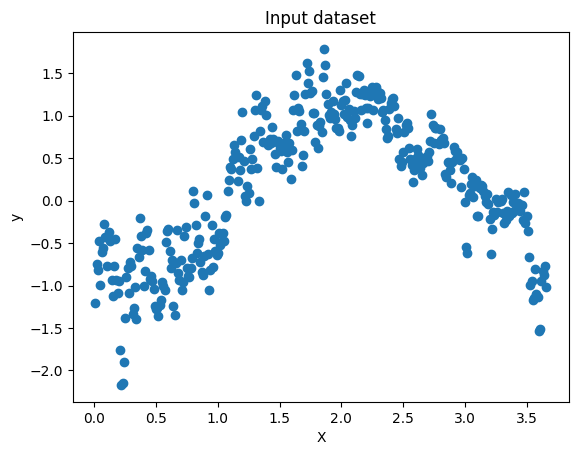

In [42]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear_2000['STOCKHOLM_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

## Merging Index and Station

In [43]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear_2000['STOCKHOLM_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

## Choose Values

In [57]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-10],[-1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 28.9 ms


## Plot Data

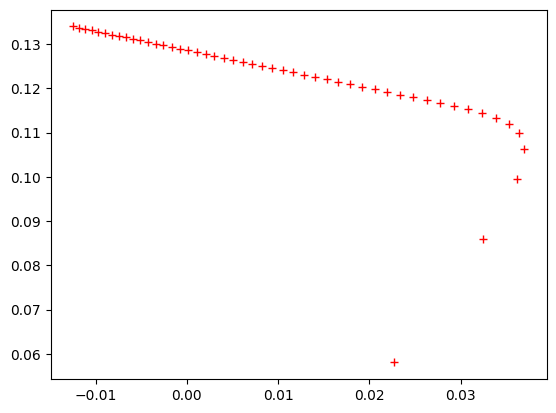

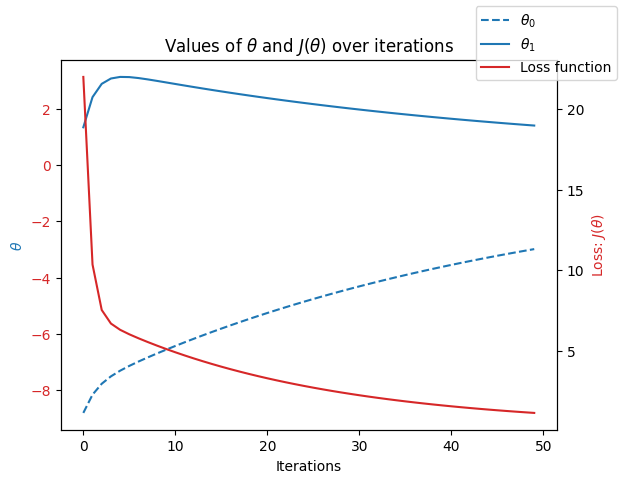

In [58]:
#This will plot your loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

## Visualizations

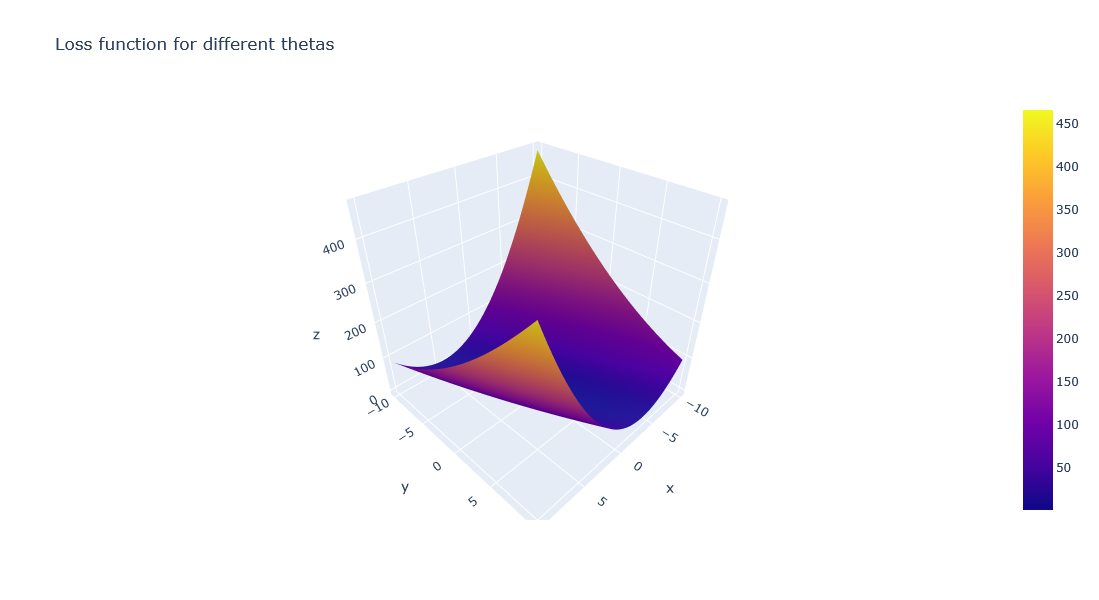

In [59]:
line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

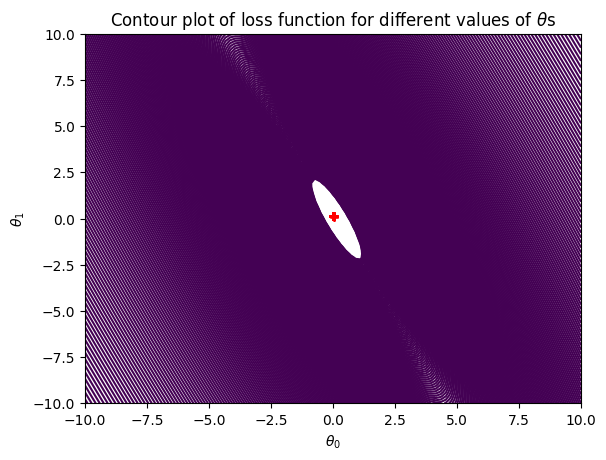

In [47]:
plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

## Summary of 3rd Station

Basically same as the other stations with some obvious variability. Landing on what looks to be very close to the minimum.

I do feel like either my guesses were too easily "perfect" or that's just the nature of the data. Will we be integrating the other factors?

I'm sure this is just a start as this concept was JUST introduced so I imagine things get vastly more complex quickly. It wasn't too bad to basically copy-paste and adjust values as necessary, but I did have to do some Googling to understand certain aspects of what's going on.

For instance, the thetas and loss line graph in the CareerFoundry instructions lead me to believe those line shapes were the target instead of looking for convergence. Once I understood that, choosing values became easier. That is the point of those line graphs, right?

In [48]:
#How well does gradient descent converge? How much do you need to adjust between different weather stations and years?

It seems like there's little need to converge. Maybe I'm reading these graphs wrong, but it seems like as long as your loss eventually gets close to 0, the thetas also converge, and the marks in the graphs land at the lowest point or within the white oval, things went well.

I didn't have to make drastic adjustments between stations and years. But my understanding is that changes in climate are rarely drastic on short time scales so we'd want to look for small trends over long periods of time. I'll add further analysis for that question in my other document.